In [30]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import lightgbm as lgb

In [31]:
df = pd.read_csv('training_data.csv')
df.head()

,PolicyNo,Policy_Company,Policy_Installment_Term,Policy_Billing_Code,Policy_Method_Of_Payment,Policy_Reinstatement_Fee_Indicator,Policy_Zip_Code_Garaging_Location,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Make_Description,...,EEA_Prior_Bodily_Injury_Limit,EEA_PolicyYear,SYS_Renewed,SYS_New_Business,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
0,164532941,Standard,6,Direct Billed to Insured,Pre-paid,N,43046,35,2004,BUIK LESABRE LI,...,100-400,2006,Y,N,320.12,0,0.0,0.0,0.0,0.0
1,164533241,Standard,6,Direct Billed to Insured,Pre-paid,N,Unknown,35,1980,CADILLAC 4-DOOR,...,100-200,2006,Y,N,259.70,0,0.0,0.0,0.0,0.0
2,164534633,Standard,6,Direct Billed to Insured,Pre-paid,N,43555,17,2005,PONT MONTANA SV,...,100-400,2006,Y,N,613.74,0,0.0,0.0,0.0,0.0
3,164534839,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,...,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0
4,164534840,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,...,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0


In [32]:
df.shape

(424431, 69)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424431 entries, 0 to 424430
Data columns (total 69 columns):
PolicyNo                                    424431 non-null int64
Policy_Company                              424431 non-null object
Policy_Installment_Term                     424431 non-null int64
Policy_Billing_Code                         424431 non-null object
Policy_Method_Of_Payment                    424431 non-null object
Policy_Reinstatement_Fee_Indicator          424431 non-null object
Policy_Zip_Code_Garaging_Location           424431 non-null object
Vehicle_Territory                           424431 non-null int64
Vehicle_Make_Year                           424431 non-null int64
Vehicle_Make_Description                    424431 non-null object
Vehicle_Performance                         424431 non-null object
Vehicle_New_Cost_Amount                     424431 non-null int64
Vehicle_Symbol                              424431 non-null int64
Vehicle_Number_Of_Driver

In [34]:
df.isnull().any()

PolicyNo                                    False
Policy_Company                              False
Policy_Installment_Term                     False
Policy_Billing_Code                         False
Policy_Method_Of_Payment                    False
Policy_Reinstatement_Fee_Indicator          False
Policy_Zip_Code_Garaging_Location           False
Vehicle_Territory                           False
Vehicle_Make_Year                           False
Vehicle_Make_Description                    False
Vehicle_Performance                         False
Vehicle_New_Cost_Amount                     False
Vehicle_Symbol                              False
Vehicle_Number_Of_Drivers_Assigned          False
Vehicle_Usage                               False
Vehicle_Miles_To_Work                       False
Vehicle_Days_Per_Week_Driven                False
Vehicle_Annual_Miles                        False
Vehicle_Anti_Theft_Device                   False
Vehicle_Passive_Restraint                   False


In [35]:
df.describe()

,PolicyNo,Policy_Installment_Term,Vehicle_Territory,Vehicle_Make_Year,Vehicle_New_Cost_Amount,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Miles_To_Work,Vehicle_Days_Per_Week_Driven,Vehicle_Age_In_Years,...,Driver_Total_Upper_Senior_Ages_70_plus,Vehicle_Driver_Points,EEA_Policy_Tenure,EEA_PolicyYear,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
count,4.244310e+05,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,...,424431.000000,424431.000000,424431.000000,424431.0,424431.000000,424431.000000,4.244310e+05,424431.000000,4.244310e+05,424431.000000
mean,3.144874e+08,6.224701,31.051629,1996.753482,290.333958,11.192347,28.397318,3.302400,4.998798,7.037130,...,0.096454,0.119765,5.886341,2006.0,335.354228,0.046893,2.354292e+02,0.115018,2.267193e+02,1.154623
std,5.776142e+07,1.139174,4.186688,7.388605,2876.619060,4.007123,43.952581,7.698294,0.080719,2.576152,...,0.314316,0.383814,6.646432,0.0,206.291385,0.223597,3.399225e+03,1.636176,3.337804e+03,55.153868
min,1.645329e+08,6.000000,13.000000,1924.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,...,0.000000,0.000000,-1.000000,2006.0,0.540000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,2.832442e+08,6.000000,30.000000,1993.000000,-1.000000,8.000000,1.000000,-1.000000,5.000000,5.000000,...,0.000000,0.000000,1.200000,2006.0,157.940000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,3.326177e+08,6.000000,31.000000,1998.000000,-1.000000,11.000000,1.000000,-1.000000,5.000000,9.000000,...,0.000000,0.000000,3.500000,2006.0,328.580000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
75%,3.612798e+08,6.000000,35.000000,2002.000000,-1.000000,14.000000,99.000000,6.000000,5.000000,9.000000,...,0.000000,0.000000,8.300000,2006.0,445.200000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
max,3.823488e+08,12.000000,37.000000,2008.000000,99999.000000,27.000000,99.000000,99.000000,9.000000,9.000000,...,2.000000,7.000000,54.000000,2006.0,3941.080000,5.000000,1.072292e+06,370.370370,1.072292e+06,24787.140000


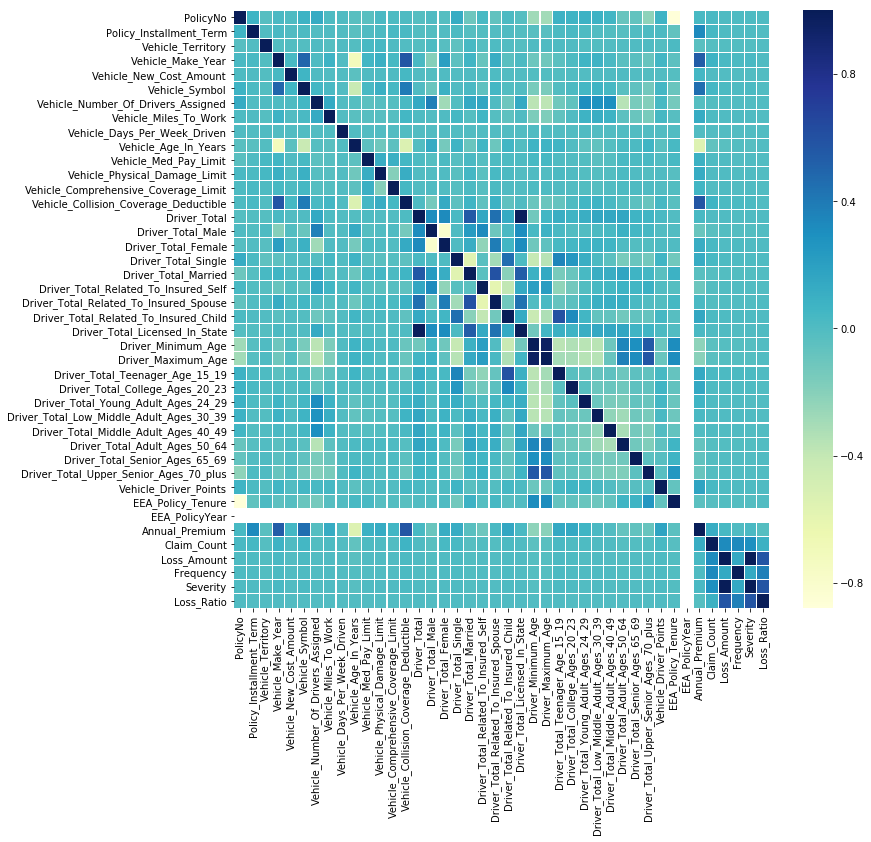

In [36]:
corrmat = df.corr()
f, ax = plt.subplots(figsize =(12, 11)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 


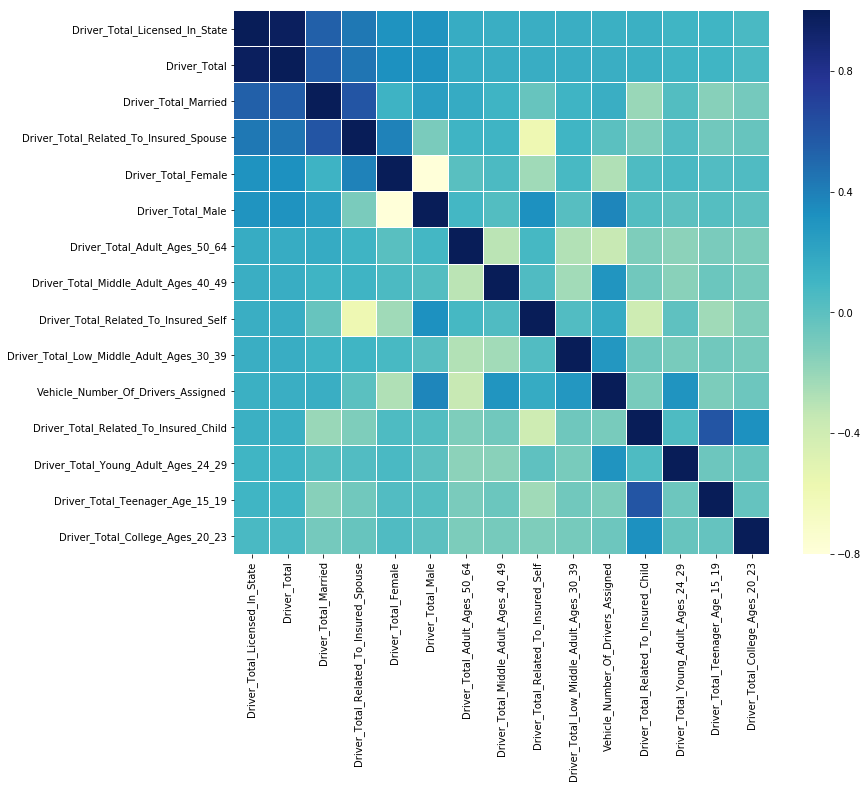

In [37]:
k = 15 
  
cols = corrmat.nlargest(k, 'Driver_Total_Licensed_In_State')['Driver_Total_Licensed_In_State'].index 
  
cm = np.corrcoef(df[cols].values.T) 
f, ax = plt.subplots(figsize =(12, 10)) 
  
sns.heatmap(cm, ax = ax, cmap ="YlGnBu", 
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values) 


Text(0.5, 1.0, 'Correlation matrix')

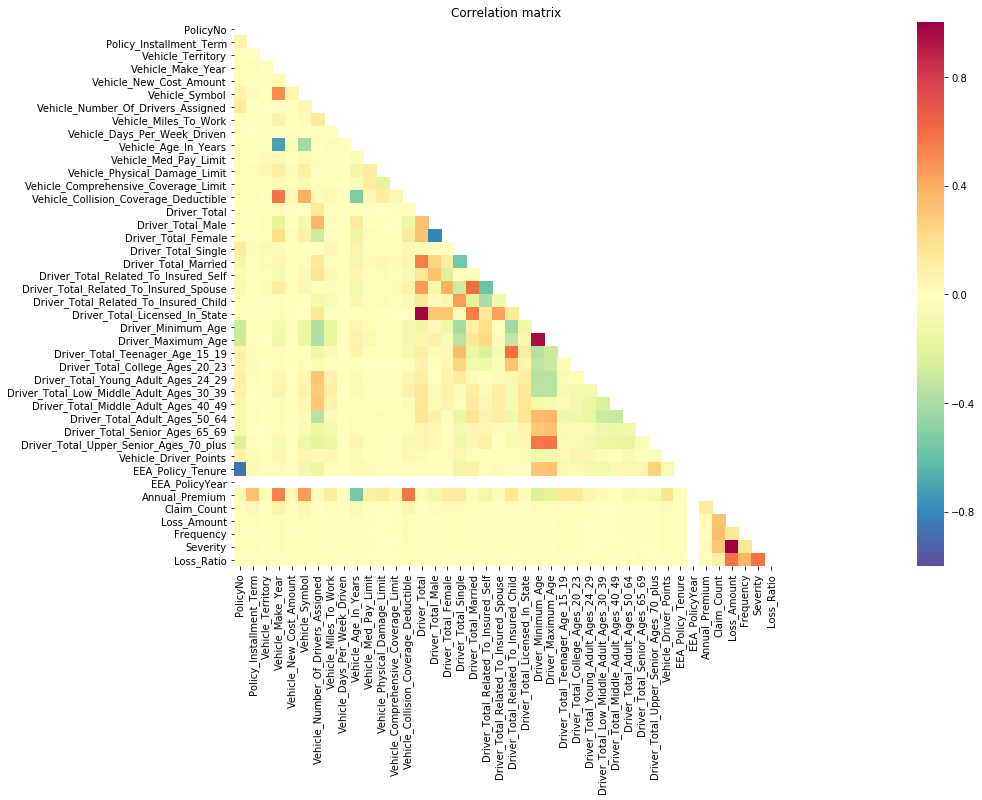

In [38]:
corrs = df.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(50,10))
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-1, vmax=1)
plt.title('Correlation matrix')

In [39]:
corrs['Loss_Amount']

PolicyNo                                    0.014785
Policy_Installment_Term                     0.015728
Vehicle_Territory                          -0.005857
Vehicle_Make_Year                           0.027465
Vehicle_New_Cost_Amount                     0.000749
Vehicle_Symbol                              0.021756
Vehicle_Number_Of_Drivers_Assigned         -0.003428
Vehicle_Miles_To_Work                       0.003734
Vehicle_Days_Per_Week_Driven               -0.001793
Vehicle_Age_In_Years                       -0.028379
Vehicle_Med_Pay_Limit                       0.006681
Vehicle_Physical_Damage_Limit               0.006070
Vehicle_Comprehensive_Coverage_Limit        0.003187
Vehicle_Collision_Coverage_Deductible       0.020509
Driver_Total                                0.004486
Driver_Total_Male                          -0.006112
Driver_Total_Female                         0.008930
Driver_Total_Single                         0.014020
Driver_Total_Married                       -0.

In [40]:
columns = ['Policy_Installment_Term', 
           'Policy_Reinstatement_Fee_Indicator',
           'Vehicle_Territory',
           'Vehicle_Make_Year',
           'Vehicle_Performance',
           'Vehicle_Symbol',
           'Vehicle_Number_Of_Drivers_Assigned',
#            'Vehicle_Days_Per_Week_Driven',
           'Vehicle_Passive_Restraint',
           'Vehicle_Age_In_Years',
           'Vehicle_Med_Pay_Limit',
           'Vehicle_Bodily_Injury_Limit',
           'Vehicle_Physical_Damage_Limit',
           'Vehicle_Comprehensive_Coverage_Indicator',
           'Vehicle_Collision_Coverage_Indicator',
#            'Driver_Total',
#            'Driver_Total_Male',
#            'Driver_Total_Female',
#            'Driver_Total_Single',
           'Driver_Total_Married',
#            'Driver_Total_Related_To_Insured_Self',
#            'Driver_Total_Related_To_Insured_Spouse',
#            'Driver_Total_Related_To_Insured_Child',
#            'Driver_Total_Licensed_In_State',
           'Driver_Minimum_Age',
           'Driver_Maximum_Age', 
#            'Driver_Total_Teenager_Age_15_19',
#            'Driver_Total_College_Ages_20_23',
#            'Driver_Total_Young_Adult_Ages_24_29',
#            'Driver_Total_Low_Middle_Adult_Ages_30_39',
#            'Driver_Total_Middle_Adult_Ages_40_49',
#            'Driver_Total_Adult_Ages_50_64',
#            'Driver_Total_Senior_Ages_65_69',
#            'Driver_Total_Upper_Senior_Ages_70_plus',
           'Vehicle_Driver_Points',
           'Vehicle_Youthful_Driver_Indicator',
           'Vehicle_Safe_Driver_Discount_Indicator',
#            'EEA_Policy_Tenure',
#            'EEA_PolicyYear',
           'SYS_Renewed',
           'SYS_New_Business',
           'Annual_Premium',
           'Loss_Amount'
          ]

In [41]:
df = df[columns]
df.head()

,Policy_Installment_Term,Policy_Reinstatement_Fee_Indicator,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Performance,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Passive_Restraint,Vehicle_Age_In_Years,Vehicle_Med_Pay_Limit,...,Driver_Total_Married,Driver_Minimum_Age,Driver_Maximum_Age,Vehicle_Driver_Points,Vehicle_Youthful_Driver_Indicator,Vehicle_Safe_Driver_Discount_Indicator,SYS_Renewed,SYS_New_Business,Annual_Premium,Loss_Amount
0,6,N,35,2004,Standard,11,1,Y,3,1000,...,0,75,75,0,N,Y,Y,N,320.12,0.0
1,6,N,35,1980,Standard,11,1,N,9,2000,...,1,71,71,0,N,Y,Y,N,259.70,0.0
2,6,N,17,2005,Standard,10,1,Y,2,50000,...,1,80,80,0,N,Y,Y,N,613.74,0.0
3,6,N,17,2005,Standard,12,1,Y,2,5000,...,1,74,74,0,N,Y,Y,N,541.66,0.0
4,6,N,17,2005,Standard,12,1,Y,2,5000,...,1,75,75,0,N,Y,Y,N,541.66,0.0


In [42]:
df.dtypes

Policy_Installment_Term                       int64
Policy_Reinstatement_Fee_Indicator           object
Vehicle_Territory                             int64
Vehicle_Make_Year                             int64
Vehicle_Performance                          object
Vehicle_Symbol                                int64
Vehicle_Number_Of_Drivers_Assigned            int64
Vehicle_Passive_Restraint                    object
Vehicle_Age_In_Years                          int64
Vehicle_Med_Pay_Limit                         int64
Vehicle_Bodily_Injury_Limit                  object
Vehicle_Physical_Damage_Limit                 int64
Vehicle_Comprehensive_Coverage_Indicator     object
Vehicle_Collision_Coverage_Indicator         object
Driver_Total_Married                          int64
Driver_Minimum_Age                            int64
Driver_Maximum_Age                            int64
Vehicle_Driver_Points                         int64
Vehicle_Youthful_Driver_Indicator            object
Vehicle_Safe

In [43]:
df['Vehicle_Symbol'].replace(-1, np.NaN, inplace=True)
df.replace('Unknown', np.NaN, inplace=True)
df['Vehicle_Med_Pay_Limit'].replace(-1,np.NaN,inplace=True)
df['Vehicle_Physical_Damage_Limit'].replace(-1,np.NaN,inplace=True)
df['Vehicle_Bodily_Injury_Limit'].replace('NA', np.NaN, inplace=True)

In [44]:
df.dropna(subset=['Vehicle_Symbol'], inplace=True)

In [45]:
df['Vehicle_Med_Pay_Limit'].fillna(df['Vehicle_Med_Pay_Limit'].median(), inplace=True)

In [46]:
df.dropna(subset=['Vehicle_Physical_Damage_Limit'], inplace=True)

In [47]:
categorical_columns = ['Policy_Reinstatement_Fee_Indicator', 'Vehicle_Performance', 'Vehicle_Passive_Restraint',
                       'Vehicle_Bodily_Injury_Limit',
                       'Vehicle_Comprehensive_Coverage_Indicator',
                       'Vehicle_Collision_Coverage_Indicator',
                       'Vehicle_Youthful_Driver_Indicator',
                       'Vehicle_Safe_Driver_Discount_Indicator',
                       'SYS_Renewed',
                       'SYS_New_Business'
                      ]

In [48]:
df = pd.get_dummies(df, columns=categorical_columns, prefix_sep="_")

In [49]:
df.isnull().sum()

Policy_Installment_Term                       0
Vehicle_Territory                             0
Vehicle_Make_Year                             0
Vehicle_Symbol                                0
Vehicle_Number_Of_Drivers_Assigned            0
Vehicle_Age_In_Years                          0
Vehicle_Med_Pay_Limit                         0
Vehicle_Physical_Damage_Limit                 0
Driver_Total_Married                          0
Driver_Minimum_Age                            0
Driver_Maximum_Age                            0
Vehicle_Driver_Points                         0
Annual_Premium                                0
Loss_Amount                                   0
Policy_Reinstatement_Fee_Indicator_N          0
Policy_Reinstatement_Fee_Indicator_Y          0
Vehicle_Performance_High                      0
Vehicle_Performance_Intermediate              0
Vehicle_Performance_Sports                    0
Vehicle_Performance_Sports Premium            0
Vehicle_Performance_Standard            

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [51]:
X = df.drop(['Loss_Amount'],axis=1)
Y = df['Loss_Amount']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [52]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
Ytrain_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, Ytrain_predict)))
mae = mean_absolute_error(Y_train, Ytrain_predict)
r2 = r2_score(Y_train, Ytrain_predict)

print("Model performance for the training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MAE is {}'.format(mae))
print('R2 score is {}'.format(r2))
print("\n")


Ytest_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Ytest_predict)))
mae = mean_absolute_error(Y_test, Ytest_predict)

# r-squared score of the model
r2 = r2_score(Y_test, Ytest_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MAE is {}'.format(mae))
print('R2 score is {}'.format(r2))

Model performance for the training set
--------------------------------------
RMSE is 3528.75191070203
MAE is 452.4375641721108
R2 score is 0.0030850460104469013


The model performance for testing set
--------------------------------------
RMSE is 2748.4358444257905
MAE is 444.4238893900996
R2 score is 0.004017732164971255


In [54]:
lgb  = lgb.LGBMRegressor()

In [55]:
lgb.fit(X_train, Y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [56]:
pred = lgb.predict(X_test)

In [57]:
Ytrain_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, Ytrain_predict)))
mae = mean_absolute_error(Y_train, Ytrain_predict)
r2 = r2_score(Y_train, Ytrain_predict)

print("Model performance for the training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MAE is {}'.format(mae))
print('R2 score is {}'.format(r2))
print("\n")


Ytest_predict = lgb.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Ytest_predict)))
mae = mean_absolute_error(Y_test, Ytest_predict)

# r-squared score of the model
r2 = r2_score(Y_test, Ytest_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MAE is {}'.format(mae))
print('R2 score is {}'.format(r2))

Model performance for the training set
--------------------------------------
RMSE is 3528.75191070203
MAE is 452.4375641721108
R2 score is 0.0030850460104469013


The model performance for testing set
--------------------------------------
RMSE is 2775.9354549499612
MAE is 442.24209127933483
R2 score is -0.016012676133405845


In [58]:
X_test.head

<bound method NDFrame.head of         Policy_Installment_Term  Vehicle_Territory  Vehicle_Make_Year  \
188536                        6                 31               1986   
140652                        6                 31               2002   
284062                        6                 31               2002   
360433                        6                 31               1996   
246605                        6                 18               1991   
210326                        6                 31               1992   
5943                          6                 30               1982   
165386                        6                 31               2004   
210189                        6                 30               2001   
421393                        6                 31               1999   
217292                        6                 31               1990   
68404                         6                 30               1987   
388696               

In [64]:
from os import listdir
from os.path import isfile, join

mypath = '2019_Fall_testing_portfolios'
portfolios = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [65]:
pred = []
for index, portfolio in enumerate(portfolios):
    df_test = pd.read_csv(mypath+'/'+portfolio)
    df_test = df_test[columns[:len(columns) - 1]]
    df_test = pd.get_dummies(df_test, columns=categorical_columns, prefix_sep="_")

    # Remove additional columns
    for col in df_test.columns:
        if col not in df.columns and col != 'Loss_Amount':
#             print("Removing additional feature {}".format(col))
            df_test.drop(col, axis=1, inplace=True)

    # Adding the extra columns in test data which are present in training dataset.
    for col in df.columns:
        if col not in df_test.columns and col != 'Loss_Amount':
#             print("Adding missing feature {}".format(col))
            df_test[col] = 0

    # re-ordering the columns in testing dataset as per the training dataset.
    cols = []
    for col in df.columns.tolist():
        if col != 'Loss_Amount':
            cols.append(col)
    df_test = df_test[cols]

    predicted_values = model.predict(df_test)
    final_values = np.log(sum(predicted_values)/sum(df_test['Annual_Premium']))
    pred.append(final_values)

portfolios = [folio.replace('test_', '') for folio in portfolios]
portfolios = [folio.replace('.csv', '') for folio in portfolios]
data = {'ID': portfolios, 'ln_LR': pred}
df_new = pd.DataFrame(data)
print(df_new)

excel_exported = df_new.to_csv (r'ln_lr.csv', index = None, header=True)

                ID     ln_LR
0      portfolio_1 -0.338193
1     portfolio_10 -0.351191
2     portfolio_11 -0.347602
3    portfolio_111 -0.341508
4    portfolio_112 -0.347056
5    portfolio_113 -0.324933
6    portfolio_114 -0.359561
7    portfolio_115 -0.342436
8    portfolio_116 -0.310716
9    portfolio_117 -0.358482
10   portfolio_118 -0.348709
11   portfolio_119 -0.333329
12    portfolio_12 -0.349087
13   portfolio_120 -0.310208
14    portfolio_13 -0.360886
15   portfolio_131 -0.343098
16   portfolio_132 -0.339973
17   portfolio_133 -0.322271
18   portfolio_134 -0.311129
19   portfolio_135 -0.326047
20   portfolio_136 -0.305487
21   portfolio_137 -0.335016
22   portfolio_138 -0.349033
23   portfolio_139 -0.313821
24    portfolio_14 -0.346347
25   portfolio_140 -0.291982
26    portfolio_15 -0.283267
27   portfolio_151 -0.320101
28   portfolio_152 -0.359658
29   portfolio_153 -0.312533
..             ...       ...
300  portfolio_578 -0.347621
301  portfolio_579 -0.344324
302   portfoli